<a href="https://colab.research.google.com/github/Keshav-Sundar-4/Gray-Scott/blob/main/Gray_Scott_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.ndimage import convolve



In [94]:
#@title Morphogen Functions

# Convert U and V to an RGB image where U is Red and V is Green
def to_rgb(U, V):

    #Clip to [0,1]
    U_normalized = np.clip(U, 0, 1)
    V_normalized = np.clip(V, 0, 1)

    # Create the RGB channels
    # U = R, V =G
    red_channel = (U_normalized * 255).astype(np.uint8)
    green_channel = (V_normalized * 255).astype(np.uint8)
    blue_channel = np.zeros_like(red_channel)  # No blue channel (set to 0)

    # Combine the channels into an RGB image
    rgb_image = np.stack([red_channel, green_channel, blue_channel], axis=-1)

    # Create and return the RGB image
    image = Image.fromarray(rgb_image, mode='RGB')
    return image




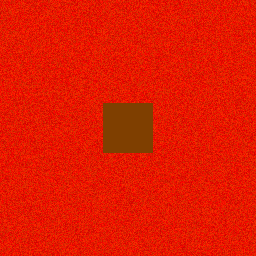

In [95]:
#@title Seed State


def seed_state_random(N):
    """
    Initialize a concentration configuration with completely random values.
    N is the side length of the (N x N)-sized grid.
    """

    # Random concentration for chemical A across the entire grid
    U = np.random.random((N, N))

    # Random concentration for chemical B across the entire grid
    V = np.random.random((N, N))

    return U, V



# SEED STATE EXAMPLE FROM https://github.com/benmaier/reaction-diffusion/blob/master/gray_scott.ipynb

def seed_state(N, random_influence=0.2):
    """
    Initialize a concentration configuration. N is the side length
    of the (N x N)-sized grid.
    `random_influence` describes how much noise is added.
    """

    # We start with a configuration where on every grid cell
    # there's a lot of chemical A, so the concentration is high
    U = (1-random_influence) * np.ones((N,N)) + random_influence * np.random.random((N,N))

    # Let's assume there's only a bit of B everywhere
    V = random_influence * np.random.random((N,N))

    # Now let's add a disturbance in the center
    N2 = N//2
    radius = r = int(N/10.0)

    U[N2-r:N2+r, N2-r:N2+r] = 0.50
    V[N2-r:N2+r, N2-r:N2+r] = 0.25

    return U, V

# Example usage:
U, V = seed_state(256)  # Initialize u and v

# Convert v to a grayscale image
v_image = to_rgb(U, V)

# Display the grayscale image of v
display(v_image)

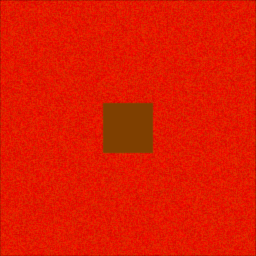

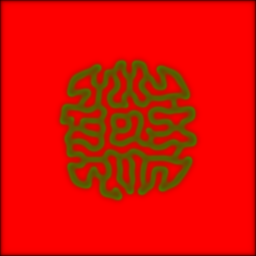

KeyboardInterrupt: 

In [96]:
#@title Gray-Scott Simulation


# Parameters
Du = 0.16
Dv = 0.08
F = 0.060
k = 0.062
dt = 1.0
size = 256 # Image is size x size grid


# Laplacian kernel for convolution
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

#Numpy Initialization
U = np.ones((size))
V = np.zeros((size))


image = Image.new("RGB", (size, size))

#Gray-Scott Model


def update_PDE(U, V, Du, Dv, F, k, dt):
    # Diffusion
    laplacian_U = convolve(U, laplacian_kernel, mode='constant', cval=0)
    laplacian_V = convolve(V, laplacian_kernel, mode='constant', cval=0)


    # Diffusion + Reaction
    dU = Du * laplacian_U - U * V**2 + F * (1 - U)
    dV = Dv * laplacian_V + U * V**2 - (F + k) * V


    U += dU * dt
    V += dV * dt

    # Clip to 0-1
    U = np.clip(U, 0, 1)
    V = np.clip(V, 0, 1)

    return U, V

# Test
U, V = seed_state(256)  # Initialize U and V

# Simulation loop
num_steps = 20000  # Iterations
for step in range(num_steps):
    U, V = update_PDE(U, V, Du, Dv, F, k, dt)

    # Display image
    if step % 5000 == 0:
        image = to_rgb(U, V)
        display(image)

# Output
image = to_rgb(U, V)
display(image)